# Model `BinaryMFPenalty`

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


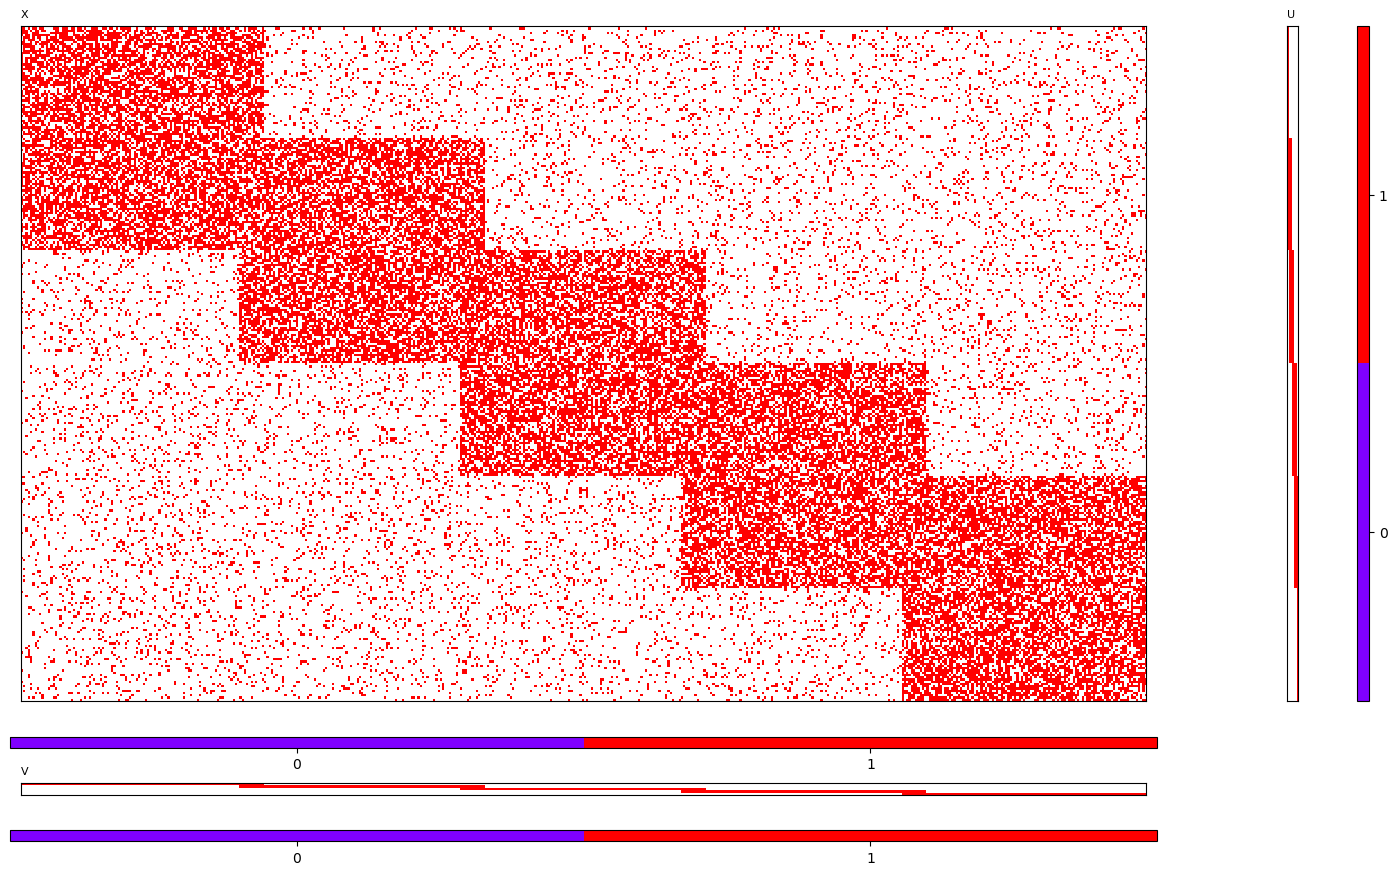

<Figure size 640x480 with 0 Axes>

In [2]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.5, 0.1, 0.5, 0.1])
data.generate(seed=1000)

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [3]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [4]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1718875920
[I]   train_size   : 43279
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1718875920


# 1.1 Init U, V with `NMFSklearn` / `WNMF`

Note that for multiplicative update, it's better to replace the zeros in init U, V with small values. 
Otherwise, these entries will not be updated.

[I] k            : 5
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.


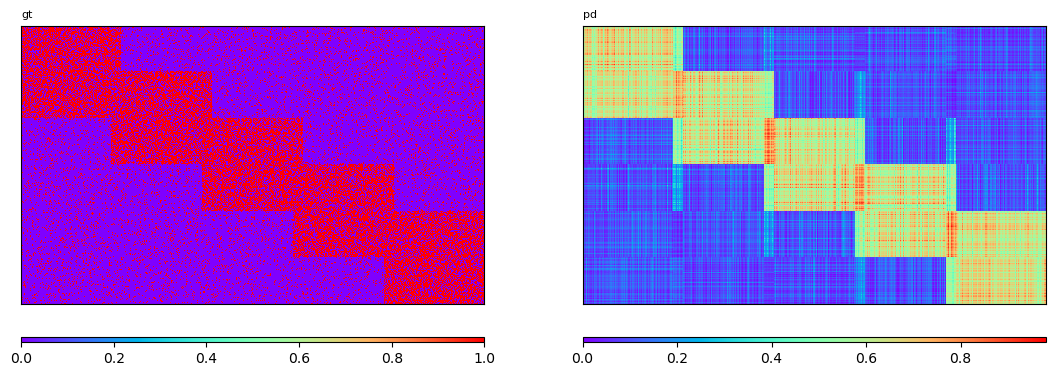

[I] model saved as: 24-06-20_17-34-26_NMFSklearn.pickle


<Figure size 640x480 with 0 Axes>

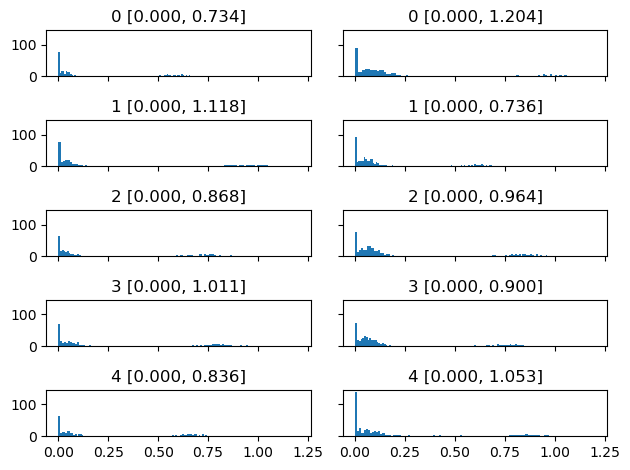

In [6]:
from models import NMFSklearn, WNMF
from utils import show_factor_distribution

k = 5

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
# model_nmf = WNMF(k=k, W='full', beta_loss='frobenius', init_method='normal', max_iter=1000, seed=2024)

model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

show_factor_distribution(U=model_nmf.U, V=model_nmf.V, resolution=100)

c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\IPython\core\interactiveshell.py:3505: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 2
[I] max_reg      : 10000000000.0
[I] tol          : 0.01
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [2.220446049250313e-16, 1.1180101669745737] -> [1.9860696394729758e-16, 1.0], V: [2.220446049250313e-16, 1.2039005684438493] -> [1.8443766100388516e-16, 1.0]
[I] iter: 1, error: 1.11e+04, rec_error: 1.10e+04, reg: 1.00e+00, reg_error: 2.60e+01
[I] iter: 2, error: 1.03e+04, rec_error: 1.03e+04, reg: 2.00e+00, reg_error: 5.13e+01
[I] iter: 3, error: 1.04e+04, rec_error: 1.03e+04, reg: 4.00e+00, reg_error: 1.01e+02
[I] iter: 4, error: 1.05e+04, re

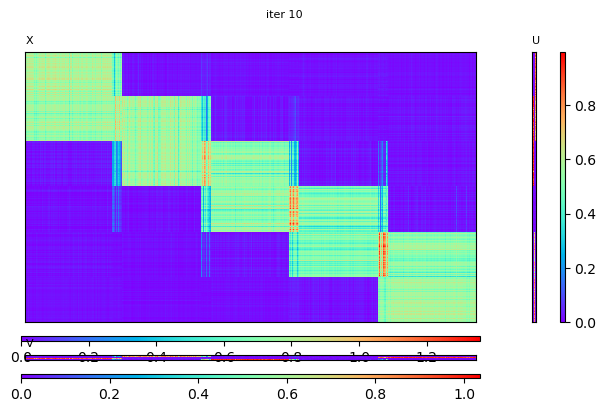

[I] iter: 11, error: 2.03e+04, rec_error: 1.09e+04, reg: 1.02e+03, reg_error: 9.37e+03
[I] iter: 12, error: 2.60e+04, rec_error: 1.13e+04, reg: 2.05e+03, reg_error: 1.47e+04
[I] iter: 13, error: 3.42e+04, rec_error: 1.17e+04, reg: 4.10e+03, reg_error: 2.25e+04
[I] iter: 14, error: 4.56e+04, rec_error: 1.22e+04, reg: 8.19e+03, reg_error: 3.34e+04
[I] iter: 15, error: 6.11e+04, rec_error: 1.26e+04, reg: 1.64e+04, reg_error: 4.85e+04
[I] iter: 16, error: 8.21e+04, rec_error: 1.30e+04, reg: 3.28e+04, reg_error: 6.91e+04
[I] iter: 17, error: 1.10e+05, rec_error: 1.34e+04, reg: 6.55e+04, reg_error: 9.69e+04
[I] iter: 18, error: 1.48e+05, rec_error: 1.38e+04, reg: 1.31e+05, reg_error: 1.34e+05
[I] iter: 19, error: 1.99e+05, rec_error: 1.41e+04, reg: 2.62e+05, reg_error: 1.85e+05
[I] iter: 20, error: 2.76e+05, rec_error: 1.43e+04, reg: 5.24e+05, reg_error: 2.61e+05


<Figure size 640x480 with 0 Axes>

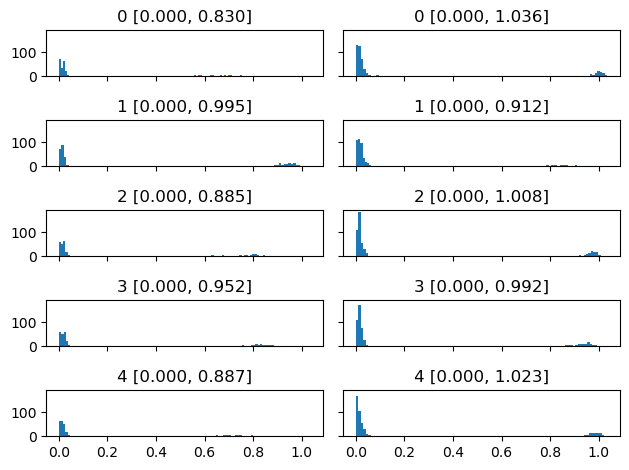

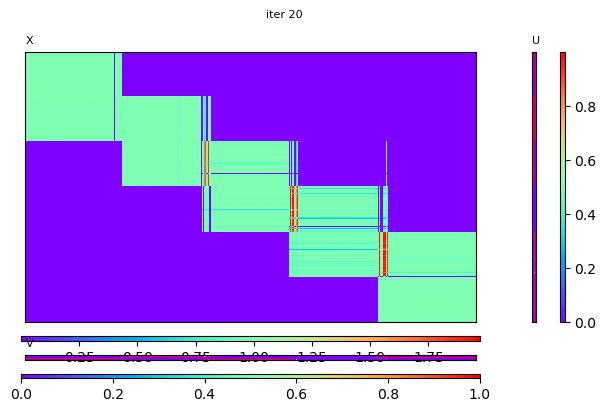

[I] iter: 21, error: 3.97e+05, rec_error: 1.45e+04, reg: 1.05e+06, reg_error: 3.82e+05
[I] iter: 22, error: 5.85e+05, rec_error: 1.47e+04, reg: 2.10e+06, reg_error: 5.70e+05
[I] iter: 23, error: 8.76e+05, rec_error: 1.48e+04, reg: 4.19e+06, reg_error: 8.61e+05
[I] iter: 24, error: 1.31e+06, rec_error: 1.49e+04, reg: 8.39e+06, reg_error: 1.30e+06
[I] iter: 25, error: 1.91e+06, rec_error: 1.49e+04, reg: 1.68e+07, reg_error: 1.90e+06
[I] iter: 26, error: 2.66e+06, rec_error: 1.50e+04, reg: 3.36e+07, reg_error: 2.64e+06
[I] iter: 27, error: 3.57e+06, rec_error: 1.50e+04, reg: 6.71e+07, reg_error: 3.55e+06
[I] iter: 28, error: 4.79e+06, rec_error: 1.51e+04, reg: 1.34e+08, reg_error: 4.78e+06
[I] iter: 29, error: 6.17e+06, rec_error: 1.51e+04, reg: 2.68e+08, reg_error: 6.16e+06
[I] iter: 30, error: 7.46e+06, rec_error: 1.51e+04, reg: 5.37e+08, reg_error: 7.45e+06


<Figure size 640x480 with 0 Axes>

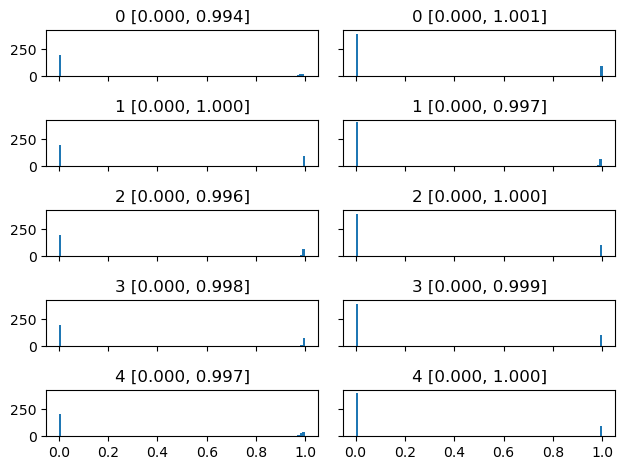

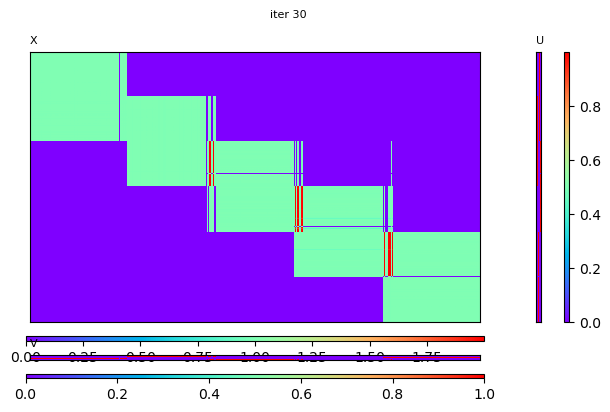

[I] iter: 31, error: 8.46e+06, rec_error: 1.51e+04, reg: 1.07e+09, reg_error: 8.45e+06
[I] iter: 32, error: 9.05e+06, rec_error: 1.51e+04, reg: 2.15e+09, reg_error: 9.04e+06
[I] iter: 33, error: 9.22e+06, rec_error: 1.51e+04, reg: 4.29e+09, reg_error: 9.21e+06
[I] iter: 34, error: 9.04e+06, rec_error: 1.51e+04, reg: 8.59e+09, reg_error: 9.02e+06
[I] iter: 35, error: 5.02e+06, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 5.00e+06
[I] iter: 36, error: 2.35e+06, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 2.33e+06
[I] iter: 37, error: 1.08e+06, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 1.07e+06
[I] iter: 38, error: 5.01e+05, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 4.86e+05
[I] iter: 39, error: 2.34e+05, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 2.19e+05
[I] iter: 40, error: 1.14e+05, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 9.84e+04


<Figure size 640x480 with 0 Axes>

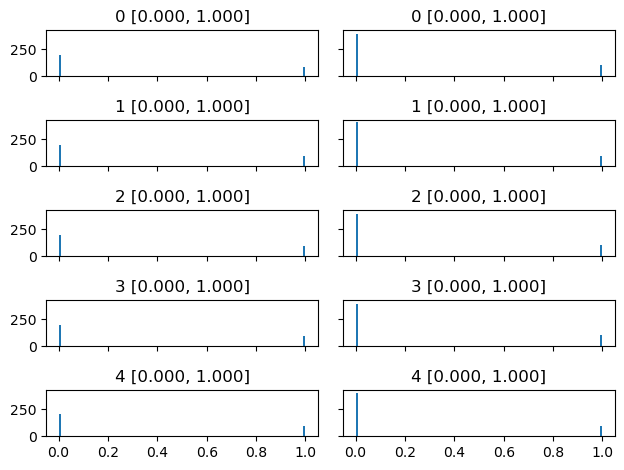

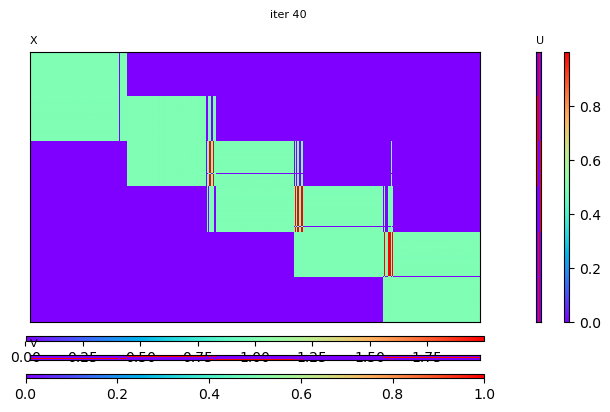

[I] iter: 41, error: 5.92e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 4.40e+04
[I] iter: 42, error: 3.48e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 1.97e+04
[I] iter: 43, error: 2.39e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 8.76e+03
[I] iter: 44, error: 1.91e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 3.90e+03
[I] iter: 45, error: 1.69e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 1.74e+03
[I] iter: 46, error: 1.59e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 7.72e+02
[I] iter: 47, error: 1.55e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 3.44e+02
[I] iter: 48, error: 1.53e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 1.53e+02
[I] iter: 49, error: 1.52e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 6.79e+01
[I] iter: 50, error: 1.52e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 3.02e+01


<Figure size 640x480 with 0 Axes>

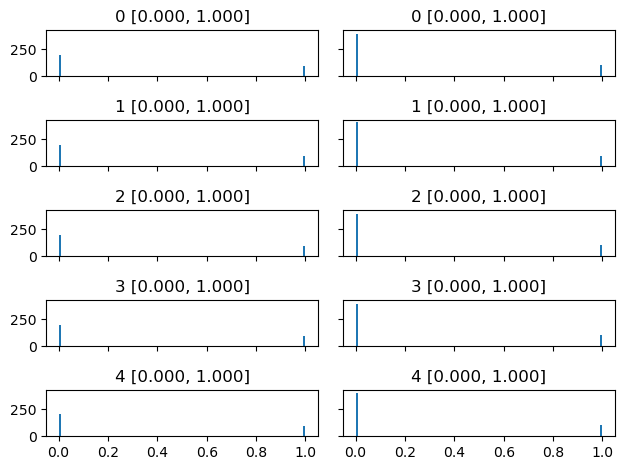

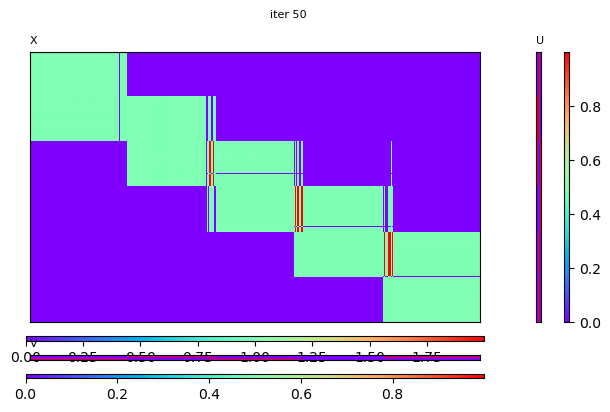

[I] iter: 51, error: 1.52e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 1.34e+01
[I] iter: 52, error: 1.52e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 5.97e+00
[I] iter: 53, error: 1.52e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 2.65e+00
[I] iter: 54, error: 1.52e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 1.18e+00
[I] iter: 55, error: 1.51e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 5.25e-01
[I] iter: 56, error: 1.51e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 2.34e-01
[I] iter: 57, error: 1.51e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 1.04e-01
[I] iter: 58, error: 1.51e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 4.65e-02
[I] iter: 59, error: 1.51e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 2.08e-02
[I] iter: 60, error: 1.51e+04, rec_error: 1.51e+04, reg: 1.00e+10, reg_error: 9.38e-03


<Figure size 640x480 with 0 Axes>

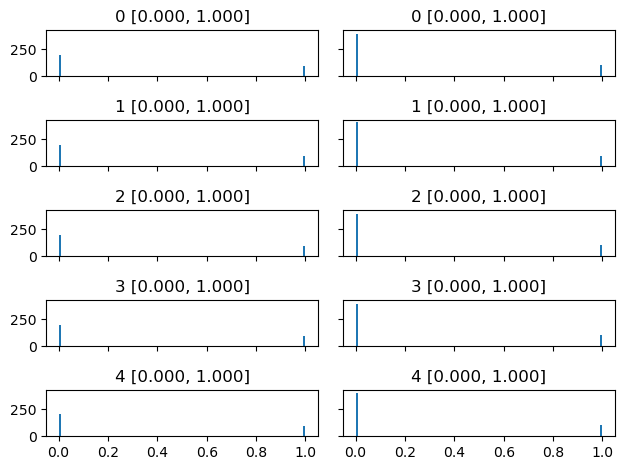

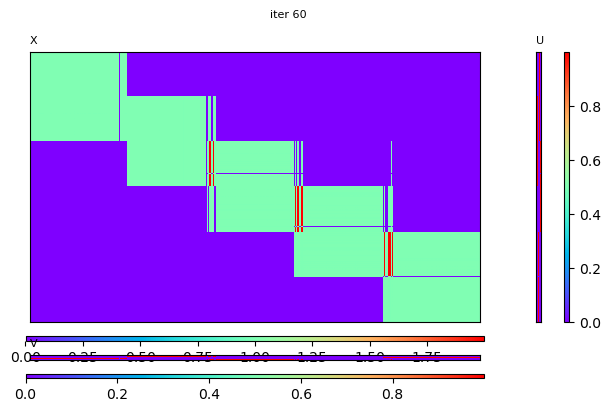

[W] Stopped in advance: Error <= tolerance


\
                                                                       
                 time iter         error     rec_error           reg   
0   20/06/24 06:06:22    0  1.106070e+04  11031.258931  1.000000e+00   
1   20/06/24 06:06:22    1  1.105723e+04  11031.258931  1.000000e+00   
2   20/06/24 06:06:22    2  1.033214e+04  10280.836321  2.000000e+00   
3   20/06/24 06:06:22    3  1.038173e+04  10281.013947  4.000000e+00   
4   20/06/24 06:06:22    4  1.047728e+04  10281.667542  8.000000e+00   
5   20/06/24 06:06:22    5  1.065754e+04  10283.747595  1.600000e+01   
6   20/06/24 06:06:22    6  1.098676e+04  10290.042493  3.200000e+01   
7   20/06/24 06:06:22    7  1.156202e+04  10307.927427  6.400000e+01   
8   20/06/24 06:06:22    8  1.252029e+04  10353.779060  1.280000e+02   
9   20/06/24 06:06:22    9  1.406128e+04  10455.884477  2.560000e+02   
10  20/06/24 06:06:22   10  1.650336e+04  10647.052438  5.120000e+02   
11  20/06/24 06:06:23   11  2.030808e+04  10939.715920  1.024000e+03   
12  20/06/24 06:06:23   12  2.600379e+04  11310.062884  2.048000e+03   
13  20/06/24 06:06:23   13  3.418437e+04  11725.534310  4.096000e+03   
14  20/06/24 06:06:23   14  4.559683e+04  12165.576484  8.192000e+03   
15  20/06/24 06:06:24   15  6.114708e+04  12610.076659  1.638400e+04   
16  20/06/24 06:06:24   16  8.213978e+04  13038.534126  3.276800e+04   
17  20/06/24 06:06:24   17  1.102976e+05  13434.872189  6.553600e+04   
18  20/06/24 06:06:24   18  1.475458e+05  13786.140945  1.310720e+05   
19  20/06/24 06:06:24   19  1.986823e+05  14086.972887  2.621440e+05   
20  20/06/24 06:06:24   20  2.756717e+05  14336.582073  5.242880e+05   
21  20/06/24 06:06:26   21  3.966084e+05  14533.331512  1.048576e+06   
22  20/06/24 06:06:26   22  5.851583e+05  14681.893048  2.097152e+06   
23  20/06/24 06:06:26   23  8.760434e+05  14794.376739  4.194304e+06   
24  20/06/24 06:06:26   24  1.311004e+06  14880.283162  8.388608e+06   
25  20/06/24 06:06:26   25  1.913500e+06  14945.991054  1.677722e+07   
26  20/06/24 06:06:26   26  2.656664e+06  14996.678117  3.355443e+07   
27  20/06/24 06:06:26   27  3.569590e+06  15036.431595  6.710886e+07   
28  20/06/24 06:06:26   28  4.792518e+06  15067.526030  1.342177e+08   
29  20/06/24 06:06:26   29  6.173404e+06  15090.351604  2.684355e+08   
30  20/06/24 06:06:26   30  7.461571e+06  15106.496540  5.368709e+08   
31  20/06/24 06:06:29   31  8.460235e+06  15118.446109  1.073742e+09   
32  20/06/24 06:06:29   32  9.051550e+06  15127.342885  2.147484e+09   
33  20/06/24 06:06:29   33  9.222326e+06  15133.858397  4.294967e+09   
34  20/06/24 06:06:29   34  9.039946e+06  15138.540672  8.589935e+09   
35  20/06/24 06:06:29   35  5.016072e+06  15141.845654  1.000000e+10   
36  20/06/24 06:06:29   36  2.345596e+06  15144.143068  1.000000e+10   
37  20/06/24 06:06:29   37  1.084962e+06  15145.720965  1.000000e+10   
38  20/06/24 06:06:29   38  5.011633e+05  15146.794976  1.000000e+10   
39  20/06/24 06:06:29   39  2.343723e+05  15147.521283  1.000000e+10   
40  20/06/24 06:06:29   40  1.135538e+05  15148.010218  1.000000e+10   
41  20/06/24 06:06:32   41  5.917635e+04  15148.338324  1.000000e+10   
42  20/06/24 06:06:32   42  3.480394e+04  15148.558032  1.000000e+10   
43  20/06/24 06:06:32   43  2.391051e+04  15148.704939  1.000000e+10   
44  20/06/24 06:06:32   44  1.905072e+04  15148.803071  1.000000e+10   
45  20/06/24 06:06:32   45  1.688538e+04  15148.868580  1.000000e+10   
46  20/06/24 06:06:32   46  1.592140e+04  15148.912292  1.000000e+10   
47  20/06/24 06:06:32   47  1.549248e+04  15148.941450  1.000000e+10   
48  20/06/24 06:06:32   48  1.530172e+04  15148.960896  1.000000e+10   
49  20/06/24 06:06:32   49  1.521689e+04  15148.973864  1.000000e+10   
50  20/06/24 06:06:32   50  1.517918e+04  15148.982511  1.000000e+10   
51  20/06/24 06:06:35   51  1.516241e+04  15148.988276  1.000000e+10   
52  20/06/24 06:06:35   52  1.515496e+04  15148.992119  1.000000e+10   
53  20/06/24 06:06:35   53  1.515165e+

<Figure size 640x480 with 0 Axes>

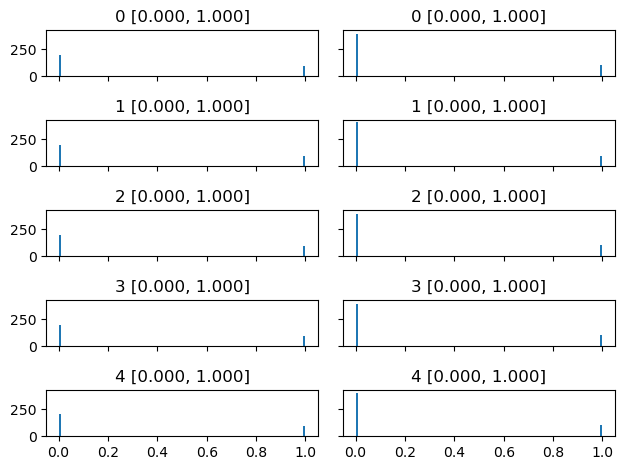

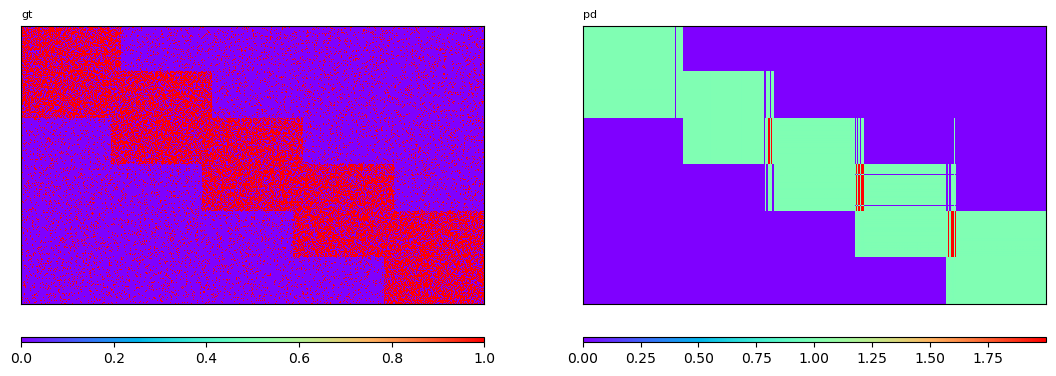

[I] model saved as: 24-06-20_18-06-39_BinaryMFPenalty.pickle


<Figure size 640x480 with 0 Axes>

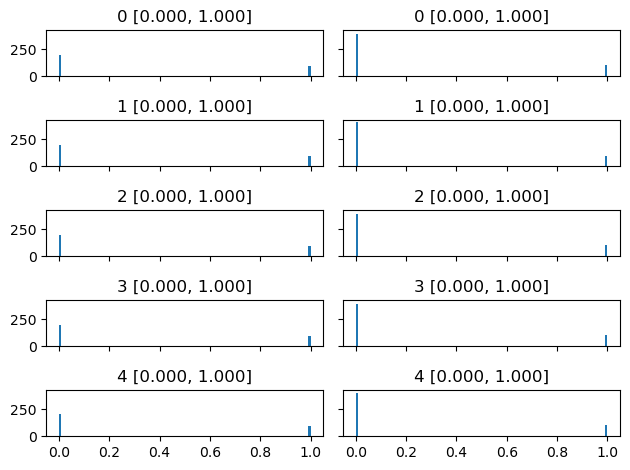

In [8]:
from models import BinaryMFPenalty
import numpy as np
from utils import show_factor_distribution

# load U and V
U, V = model_nmf.U, model_nmf.V

# replace zeros
U[U == 0] = np.finfo(float).eps
V[V == 0] = np.finfo(float).eps

# params for BinaryMFPenalty and BinaryMFPenaltyExSigmoid
k = 5
reg = 1
reg_growth = 2
W = 'full'
task = 'reconstruction'

model_bmfp_1 = BinaryMFPenalty(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
model_bmfp_1.fit(X_train=X_train, task=task, verbose=True, display=True)

show_factor_distribution(U=model_bmfp_1.U, V=model_bmfp_1.V, resolution=100)

# 1.2 Thresholding with `BinaryMFThresholdExSigmoid`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 20
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] solver       : line-search
[I] init_method  : custom
[I] seed         : 1718872277
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [1.7373879795408751e-13, 0.9999999976563811] -> [1.7373879836126505e-13, 1.0], V: [1.0307775020997292e-40, 0.9999999977190571] -> [1.0307775044508739e-40, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [4059.450, 6813.590]
[I] iter: 2, start: [0.596, 0.932], direction: [3.507, 2328.657]
[I] iter: 3, start: [0.596, 1.000], direction: [-5.308, -8621.166]
[I] iter: 4, start: [0.596, 0.984], direction: [2.004, 2734.447]
[I] iter: 5, start: [0.596, 0.989], direction: [-0.141, -196.701]
[I] iter: 6, start: [0.596,

train  \
                                                                    0   
                time iter         u         v             F    Recall   
0  20/06/24 04:31:17    0  0.100000  0.100000  14516.896372  0.741306   
1  20/06/24 04:31:17    1  0.595538  0.931737  13722.272660  0.741306   
2  20/06/24 04:31:17    2  0.595645  1.000000  11805.498887  0.001733   
3  20/06/24 04:31:18    3  0.595635  0.983556  11394.042964  0.741306   
4  20/06/24 04:31:18    4  0.595639  0.988772  11323.794809  0.741306   
5  20/06/24 04:31:19    5  0.595639  0.988397  11323.510512  0.741306   
6  20/06/24 04:31:19    6  0.595639  0.988482  11323.495762  0.741306   
7  20/06/24 04:31:20    7  0.595639  0.988463  11323.495068  0.741306   

                                 
                                 
  Precision  Accuracy        F1  
0  0.640277  0.805193  0.687098  
1  0.640277  0.805193  0.687098  
2  0.765306  0.711820  0.003458  
3  0.640277  0.805193  0.687098  
4  0.640277  0.805193  0.687098  
5  0.640277  0.805193  0.687098  
6  0.640277  0.805193  0.687098  
7  0.640277  0.805193  0.687098

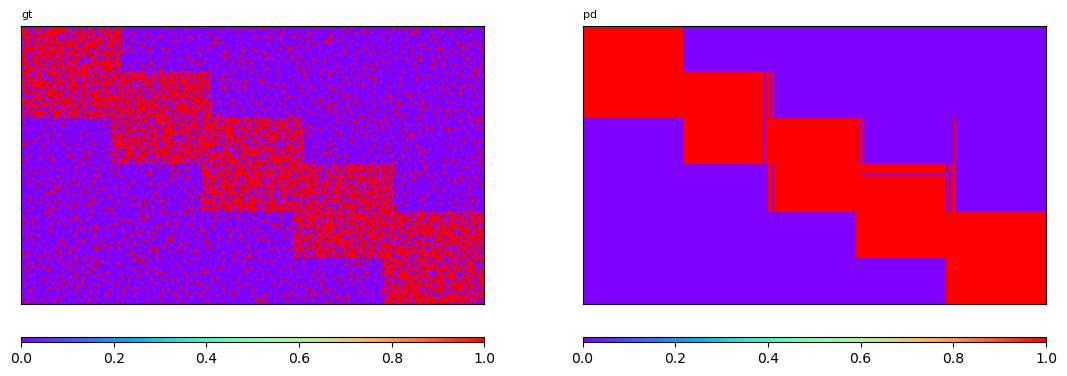

[I] model saved as: 24-06-20_16-31-20_BinaryMFThresholdExSigmoid.pickle


<Figure size 640x480 with 0 Axes>

In [7]:
from models import BinaryMFThresholdExSigmoid

u, v = 0.1, 0.1

model_bmfts_1 = BinaryMFThresholdExSigmoid(k=k, U=model_bmfp_1.U, V=model_bmfp_1.V, W=W, u=u, v=v, init_method='custom', lamda=20)
model_bmfts_1.fit(X_train=X_train, task=task, verbose=False, display=False)

In [8]:
# # check pattern density

# from utils import binarize, matmul, show_matrix, to_sparse, multiply

# U = binarize(model_bmfts_1.U, model_bmfts_1.u)
# V = binarize(model_bmfts_1.V, model_bmfts_1.v)

# U, V = to_sparse(U), to_sparse(V)

# X = matmul(U, V.T, sparse=True, boolean=True)
# density = multiply(X, X_train).sum() / X.sum()
# show_matrix([(X, [0, 0], f"X density: {density}")])

# for i in range(k):
#     X = matmul(U[:, i], V[:, i].T, sparse=True, boolean=True)
#     density = multiply(X, X_train).sum() / X.sum()
#     show_matrix([(X, [0, 0], f"X_{i} density: {density}")])

# 2.1 Init U, V randomly

If `BinaryMFPenalty` is initialized with `init_method` == `normal` or `uniform`, then `reg` and `reg_growth` should not be set too large. It's hard to tweak comparing to `NMFSklearn` init.

[I] k            : 5
[I] U            : None
[I] V            : None
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 1.1
[I] max_reg      : 10000000000.0
[I] tol          : 0.01
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : normal
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized U: [0.0008838916076722335, 0.8469211700512891] -> [0.0010436527494273233, 1.0], V: [0.00010647605073931424, 1.0574794948005815] -> [0.00010068852517976568, 1.0]
[W] Stopped in advance: Reach maximum iteration


\
                                                                        
                  time iter         error     rec_error           reg   
0    20/06/24 04:31:20    0  16867.929956  16818.885291      1.000000   
1    20/06/24 04:31:20    1  16877.367808  16818.885291      1.000000   
2    20/06/24 04:31:20    2  15343.027308  15277.899246      1.100000   
3    20/06/24 04:31:21    3  15197.252332  15125.288652      1.210000   
4    20/06/24 04:31:21    4  15040.864573  14962.157242      1.331000   
5    20/06/24 04:31:21    5  14759.392136  14674.652042      1.464100   
6    20/06/24 04:31:21    6  14284.856443  14194.999735      1.610510   
7    20/06/24 04:31:21    7  13709.326332  13614.492631      1.771561   
8    20/06/24 04:31:21    8  13225.829331  13125.396078      1.948717   
9    20/06/24 04:31:21    9  12887.663809  12780.942445      2.143589   
10   20/06/24 04:31:21   10  12600.137177  12486.972882      2.357948   
11   20/06/24 04:31:21   11  12293.329709  12173.838010      2.593742   
12   20/06/24 04:31:21   12  11996.976518  11870.636539      2.853117   
13   20/06/24 04:31:21   13  11770.355144  11635.769847      3.138428   
14   20/06/24 04:31:21   14  11625.084225  11480.552149      3.452271   
15   20/06/24 04:31:21   15  11535.824170  11379.824689      3.797498   
16   20/06/24 04:31:21   16  11475.907513  11307.196559      4.177248   
17   20/06/24 04:31:21   17  11428.754401  11246.292643      4.594973   
18   20/06/24 04:31:21   18  11385.620249  11188.473864      5.054470   
19   20/06/24 04:31:21   19  11342.476092  11129.704410      5.559917   
20   20/06/24 04:31:21   20  11298.338705  11068.865719      6.115909   
21   20/06/24 04:31:21   21  11254.299571  11006.793033      6.727500   
22   20/06/24 04:31:21   22  11212.643109  10945.442096      7.400250   
23   20/06/24 04:31:21   23  11175.941574  10887.057115      8.140275   
24   20/06/24 04:31:21   24  11146.324828  10833.498414      8.954302   
25   20/06/24 04:31:21   25  11125.110057  10785.886472      9.849733   
26   20/06/24 04:31:21   26  11112.785931  10744.572762     10.834706   
27   20/06/24 04:31:21   27  11109.247634  10709.366148     11.918177   
28   20/06/24 04:31:22   28  11114.081602  10679.799866     13.109994   
29   20/06/24 04:31:22   29  11126.678839  10655.210973     14.420994   
30   20/06/24 04:31:22   30  11146.299074  10634.789178     15.863093   
31   20/06/24 04:31:22   31  11172.226454  10617.735444     17.449402   
32   20/06/24 04:31:22   32  11203.892474  10603.391094     19.194342   
33   20/06/24 04:31:22   33  11240.908754  10591.277908     21.113777   
34   20/06/24 04:31:22   34  11283.046795  10581.085851     23.225154   
35   20/06/24 04:31:22   35  11330.198862  10572.641124     25.547670   
36   20/06/24 04:31:22   36  11382.339042  10565.874100     28.102437   
37   20/06/24 04:31:22   37  11439.492569  10560.798696     30.912681   
38   20/06/24 04:31:22   38  11501.710348  10557.502950     34.003949   
39   20/06/24 04:31:22   39  11569.040697  10556.141438     37.404343   
40   20/06/24 04:31:22   40  11641.495369  10556.922655     41.144778   
41   20/06/24 04:31:22   41  11719.014158  10560.091943     45.259256   
42   20/06/24 04:31:22   42  11801.435380  10565.915438     49.785181   
43   20/06/24 04:31:22   43  11888.478180  10574.670489     54.763699   
44   20/06/24 04:31:22   44  11979.739636  10586.643231     60.240069   
45   20/06/24 04:31:22   45  12074.707853  10602.131232     66.264076   
46   20/06/24 04:31:22   46  12172.790903  10621.449346     72.890484   
47   20/06/24 04:31:22   47  12273.360091  10644.935829     80.179532   
48   20/06/24 04:31:22   48  12375.804873  10672.956319     88.197485   
49   20/06/24 04:31:22   49  12479.595362  10705.906701     97.017234   
50   20/06/24 04:31:22   50  12584.343149  10744.216773    106.718957   
51   20/06/24 04:31:22   51  12689.841097  10788.358079    117.390853   
52   20/06/24 04:31:22   52  12796.057601  10838.849737 

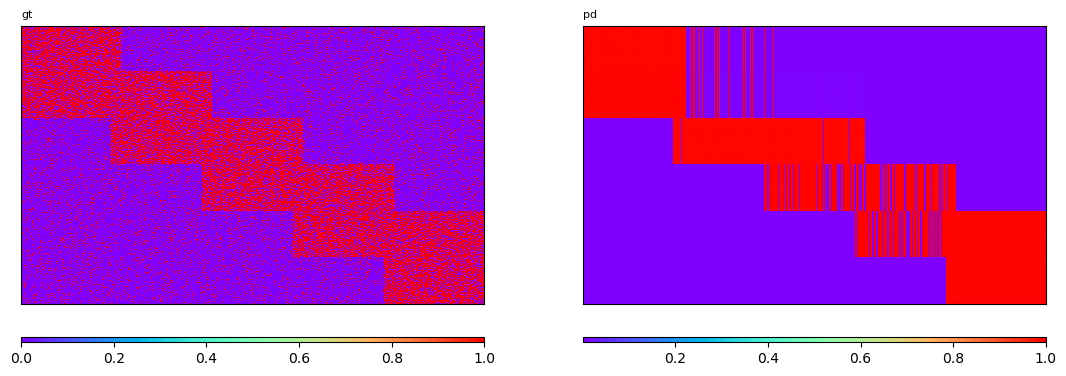

[I] model saved as: 24-06-20_16-31-25_BinaryMFPenalty.pickle


<Figure size 640x480 with 0 Axes>

In [9]:
init_method = 'normal'
# init_method = 'uniform'

reg = 1
reg_growth = 1.1

model_bmfp_2 = BinaryMFPenalty(k=k, U=None, V=None, reg=reg, reg_growth=reg_growth, init_method=init_method, max_iter=100, seed=2024)
model_bmfp_2.fit(X_train=X_train, task=task, verbose=False, display=True)

show_factor_distribution(U=model_bmfp_2.U, V=model_bmfp_2.V, resolution=100)

# 2.2 Thresholding with `BinaryMFThresholdExSigmoid`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] solver       : line-search
[I] init_method  : custom
[I] seed         : 1718872285
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [5.722079879526563e-23, 0.9992006209049388] -> [5.726657649936494e-23, 1.0], V: [8.375721240351515e-39, 0.9993450288224255] -> [8.381210691787815e-39, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [-0.362, -0.460]
[I] iter: 2, start: [0.032, 0.014], direction: [8601.493, 42654.313]
[I] iter: 3, start: [0.036, 0.034], direction: [-639.951, -791.938]
[I] iter: 4, start: [0.024, 0.019], direction: [10063.255, 12031.408]
[I] iter: 5, start: [0.026, 0.022], direction: [-2713.892, -4243.282]
[I] iter: 6, start: 

train  \
                                                                     0   
                 time iter         u         v             F    Recall   
0   20/06/24 04:31:25    0  0.100000  0.100000  15246.961651  0.665196   
1   20/06/24 04:31:25    1  0.032095  0.013771  15244.396845  0.665196   
2   20/06/24 04:31:26    2  0.036197  0.034111  15152.836543  0.665196   
3   20/06/24 04:31:26    3  0.023991  0.019006  14708.868390  0.665196   
4   20/06/24 04:31:26    4  0.026390  0.021874  14634.242721  0.665196   
5   20/06/24 04:31:27    5  0.025096  0.019851  14587.984291  0.665196   
6   20/06/24 04:31:27    6  0.025656  0.020422  14579.171727  0.665196   
7   20/06/24 04:31:28    7  0.025562  0.019950  14578.800381  0.665196   
8   20/06/24 04:31:28    8  0.996454  0.779957  13000.029862  0.337046   
9   20/06/24 04:31:29    9  0.991545  0.779957  12703.217866  0.665196   
10  20/06/24 04:31:29   10  0.993989  0.779957  12456.521911  0.594700   
11  20/06/24 04:31:29   11  0.993563  0.779957  12453.333129  0.628989   
12  20/06/24 04:31:30   12  0.993800  0.779957  12452.182815  0.609533   
13  20/06/24 04:31:30   13  0.993675  0.779957  12451.889299  0.628989   
14  20/06/24 04:31:31   14  0.993743  0.779957  12451.797916  0.624206   
15  20/06/24 04:31:31   15  0.993707  0.779957  12451.772248  0.626077   
16  20/06/24 04:31:32   16  0.993727  0.779957  12451.764618  0.624206   
17  20/06/24 04:31:32   17  0.993716  0.779957  12451.762417  0.626077   
18  20/06/24 04:31:33   18  0.993722  0.779957  12451.761772  0.624206   

                                  
                                  
   Precision  Accuracy        F1  
0   0.636925  0.793993  0.650753  
1   0.636925  0.793993  0.650753  
2   0.636925  0.793993  0.650753  
3   0.636925  0.793993  0.650753  
4   0.636925  0.793993  0.650753  
5   0.636925  0.793993  0.650753  
6   0.636925  0.793993  0.650753  
7   0.636925  0.793993  0.650753  
8   0.659389  0.758487  0.446079  
9   0.636925  0.793993  0.650753  
10  0.641110  0.787007  0.617033  
11  0.639795  0.790780  0.634346  
12  0.640820  0.788767  0.624785  
13  0.639795  0.790780  0.634346  
14  0.640378  0.790433  0.632189  
15  0.639902  0.790460  0.632914  
16  0.640378  0.790433  0.632189  
17  0.639902  0.790460  0.632914  
18  0.640378  0.790433  0.632189

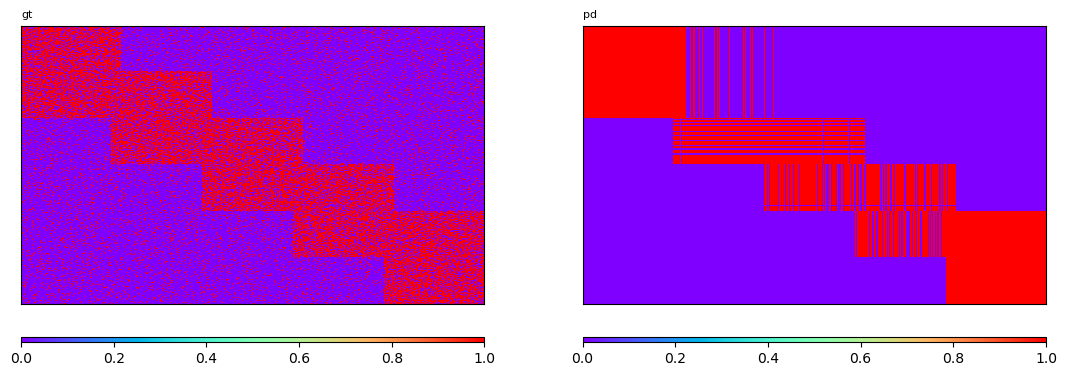

[I] model saved as: 24-06-20_16-31-33_BinaryMFThresholdExSigmoid.pickle


<Figure size 640x480 with 0 Axes>

In [10]:
model_bmfts_2 = BinaryMFThresholdExSigmoid(k=k, U=model_bmfp_2.U, V=model_bmfp_2.V, W=W, u=u, v=v, init_method='custom')
model_bmfts_2.fit(X_train=X_train, task=task, verbose=False, display=False)